In [1]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from urllib.parse import urlparse

In [2]:
# Import data
df1 = pd.read_csv('comments_emotions.csv')
df2 = pd.read_csv('classified_posts.csv')

In [115]:
df1 = df1.rename(columns={"link_id": "id"})

In [5]:
emot_react_df = pd.merge(df1, df2, how='inner', on = 'id')

In [8]:
# Prepare data for the topic-emotion pie plots
emote_lst =['anger', 'joy', 'fear', 'love', 'surprise', 'sadness']

pie_data = pd.DataFrame(np.zeros((3, 6)))
pie_data = pie_data.rename(columns={0: "anger", 1: "joy", 2: "fear", 3: "love", 4: "surprise", 5: "sadness",})
pie_data = pie_data.rename(index={0: "RELATIONSHIPS", 1: "ACTIVITIES", 2: "FOODS"})

for emotion in emote_lst:
        x = emot_react_df.groupby(['label'])['emote'].apply(lambda x: x[x.str.contains(emotion)].count())
        y = pie_data[emotion].to_numpy()
        pie_data[emotion] = (x.to_numpy() + y).tolist()
pie_data.iloc[0] = pie_data.iloc[0].apply(lambda x : x/8)

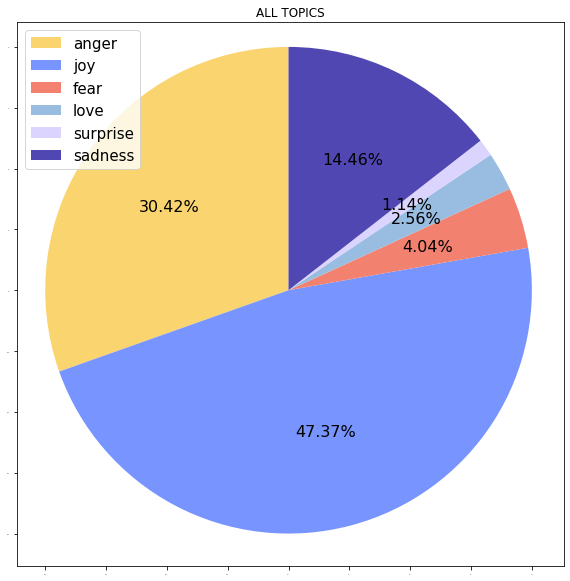

In [47]:
# All_topics-emotion pie plot
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=0)
plt.rc('ytick', labelsize=0)
plt.rc('legend', fontsize=15)

plt.pie(pie_data.sum(axis=0).tolist(), labels=emote_lst, startangle=90,
                    frame=True, labeldistance=None, autopct='%1.2f%%',
                    colors=(np.array(['#fad46f', '#7894ff', '#f38170','#99bde1', '#dbd4fe',  '#5147B2'])),
                    textprops={"size":16})

plt.title('ALL TOPICS')
plt.legend()
plt.show()

In [55]:
# Save baseline percentages
total = sum(pie_data.sum(axis=0).tolist())
baseline = []
for i in range(6):
    baseline.append(pie_data.sum(axis=0).tolist()[i]*100/total)
baseline

[30.424320361629476,
 47.370830958678575,
 4.043001953305763,
 2.5582947299713092,
 1.1403213942998545,
 14.463230602115026]

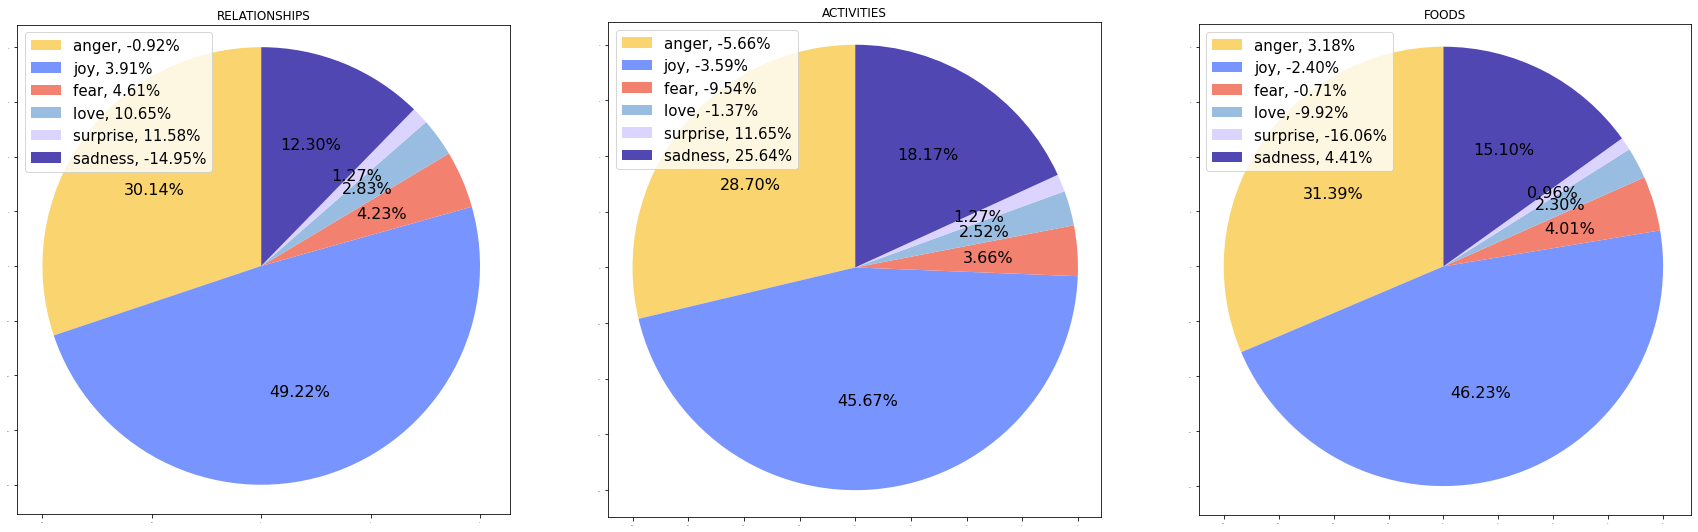

In [114]:
# Topic-emotion pie plots
topic_lst = ["RELATIONSHIPS", "ACTIVITIES", "FOODS"]

percentages_all = []
for i, topic in enumerate(topic_lst):

    data = pie_data.loc[topic].to_numpy()

    total = data.sum()
    percentages_t = []
    for i in range(6):
        percentages_t.append(data[i]*100/total)
    percentages_all.append(percentages_t)

final_list = []
for i in percentages_all:
    newlist = []
    for num,j in enumerate(i):
        newlist.append((j-baseline[num])/baseline[num]*100)
    final_list.append(newlist)

figure, axis = plt.subplots(1, 3, figsize=(30,10))
plt.rc('xtick', labelsize=0)
plt.rc('ytick', labelsize=0)
plt.rc('legend', fontsize=15)

for i, topic in enumerate(topic_lst):
    
    data = pie_data.loc[topic].to_numpy()

    
    mylabels = [emote_lst[0] + ', ' + str("%.2f" % final_list[i][0]) + '%',
                emote_lst[1] + ', ' + str("%.2f" % final_list[i][1]) + '%',
                emote_lst[2] + ', ' + str("%.2f" % final_list[i][2]) + '%',
                emote_lst[3] + ', ' + str("%.2f" % final_list[i][3]) + '%',
                emote_lst[4] + ', ' + str("%.2f" % final_list[i][4]) + '%',
                emote_lst[5] + ', ' + str("%.2f" % final_list[i][5]) + '%']
    axis[i].pie(data, labels=emote_lst, startangle=90, frame=True, labeldistance=None, autopct='%1.2f%%', textprops={"size":16}, colors=(np.array(['#fad46f', '#7894ff', '#f38170','#99bde1', '#dbd4fe',  '#5147B2'])))
    axis[i].title.set_text(topic)
    axis[i].legend(labels=mylabels, loc='upper left')

plt.show() 

In [107]:
"%.2f" % final_list[i][0]

'3.18'